In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [53]:
df.shape

(50000, 2)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

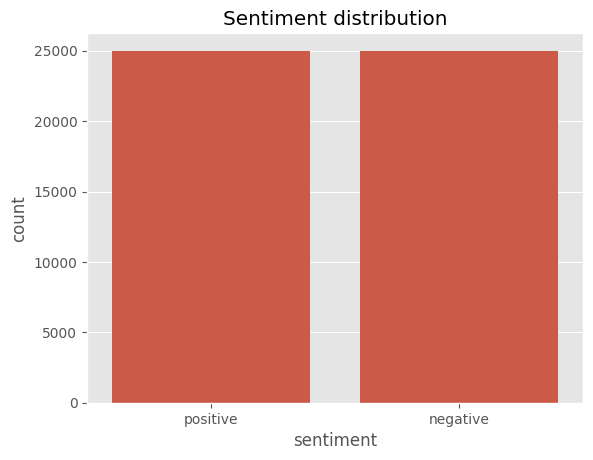

In [55]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [56]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [57]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [58]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [59]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [60]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [61]:
df.review = df['review'].apply(data_processing)

In [62]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)
df = df.drop_duplicates('review')

Number of duplicate entries:  421


In [64]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [65]:
df.review = df['review'].apply(lambda x: stemming(x))

In [66]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [67]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


In [68]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1

In [69]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [70]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [71]:
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


In [74]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1

neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [75]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [76]:
X = df['review']
Y = df['sentiment']

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [79]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (37183, 221707)
Size of y_train:  (37183,)
Size of x_test:  (12395, 221707)
Size of y_test:  (12395,)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.01%


In [82]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[5342  746]
 [ 616 5691]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6088
           1       0.88      0.90      0.89      6307

    accuracy                           0.89     12395
   macro avg       0.89      0.89      0.89     12395
weighted avg       0.89      0.89      0.89     12395



In [83]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.36%


In [84]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[5330  758]
 [ 933 5374]]


              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6088
           1       0.88      0.85      0.86      6307

    accuracy                           0.86     12395
   macro avg       0.86      0.86      0.86     12395
weighted avg       0.86      0.86      0.86     12395



In [85]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Test accuracy: 89.29%


In [86]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[5386  702]
 [ 626 5681]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6088
           1       0.89      0.90      0.90      6307

    accuracy                           0.89     12395
   macro avg       0.89      0.89      0.89     12395
weighted avg       0.89      0.89      0.89     12395



In [87]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 1/5] END .................C=0.1, loss=hinge;, score=0.876 total time=   0.3s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 2/5] END .................C=0.1, loss=hinge;, score=0.880 total time=   0.2s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 3/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.3s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 4/5] END .................C=0.1, loss=hinge;, score=0.880 total time=   0.3s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 5/5] END .................C=0.1, loss=hinge;, score=0.877 total time=   0.3s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.5s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.5s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.889 total time=   0.5s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.896 total time=   0.5s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.893 total time=   0.6s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 1/5] END ...................C=1, loss=hinge;, score=0.893 total time=   1.0s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 2/5] END ...................C=1, loss=hinge;, score=0.894 total time=   0.8s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 3/5] END ...................C=1, loss=hinge;, score=0.894 total time=   1.3s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 4/5] END ...................C=1, loss=hinge;, score=0.897 total time=   0.9s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 5/5] END ...................C=1, loss=hinge;, score=0.899 total time=   1.0s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 1/5] END ...........C=1, loss=squared_hinge;, score=0.892 total time=   0.8s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 2/5] END ...........C=1, loss=squared_hinge;, score=0.892 total time=   0.9s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 3/5] END ...........C=1, loss=squared_hinge;, score=0.892 total time=   0.9s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 4/5] END ...........C=1, loss=squared_hinge;, score=0.896 total time=   0.9s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 5/5] END ...........C=1, loss=squared_hinge;, score=0.897 total time=   1.0s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 1/5] END ..................C=10, loss=hinge;, score=0.878 total time=  11.0s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 2/5] END ..................C=10, loss=hinge;, score=0.876 total time=   4.2s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 3/5] END ..................C=10, loss=hinge;, score=0.876 total time=  12.7s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 4/5] END ..................C=10, loss=hinge;, score=0.887 total time=  15.9s
[CV 5/5] END ..................C=10, loss=hinge;, score=0.878 total time=   4.9s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 1/5] END ..........C=10, loss=squared_hinge;, score=0.883 total time=   4.5s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 2/5] END ..........C=10, loss=squared_hinge;, score=0.880 total time=   2.4s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 3/5] END ..........C=10, loss=squared_hinge;, score=0.880 total time=   3.9s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 4/5] END ..........C=10, loss=squared_hinge;, score=0.889 total time=   3.1s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 5/5] END ..........C=10, loss=squared_hinge;, score=0.882 total time=   2.7s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 1/5] END .................C=100, loss=hinge;, score=0.876 total time=  14.1s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 2/5] END .................C=100, loss=hinge;, score=0.874 total time=   5.2s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 3/5] END .................C=100, loss=hinge;, score=0.875 total time=  14.4s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 4/5] END .................C=100, loss=hinge;, score=0.884 total time=  14.3s
[CV 5/5] END .................C=100, loss=hinge;, score=0.878 total time=   3.9s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 1/5] END .........C=100, loss=squared_hinge;, score=0.877 total time=   7.6s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 2/5] END .........C=100, loss=squared_hinge;, score=0.876 total time=   5.0s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 3/5] END .........C=100, loss=squared_hinge;, score=0.875 total time=  11.0s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 4/5] END .........C=100, loss=squared_hinge;, score=0.885 total time=  10.8s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



[CV 5/5] END .........C=100, loss=squared_hinge;, score=0.879 total time=   3.2s


c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [89]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.90
best parameters:  {'C': 1, 'loss': 'hinge'}


In [90]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

c:\Users\Razil\.conda\envs\DL\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Test accuracy: 89.41%


In [91]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[5383  705]
 [ 608 5699]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6088
           1       0.89      0.90      0.90      6307

    accuracy                           0.89     12395
   macro avg       0.89      0.89      0.89     12395
weighted avg       0.89      0.89      0.89     12395

